<a href="https://colab.research.google.com/github/bilik49/algorithms_itmo/blob/main/algorithms_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Part I

In [17]:
def f(x):
    return 1 / (x ** 2 - 3 * x + 2)

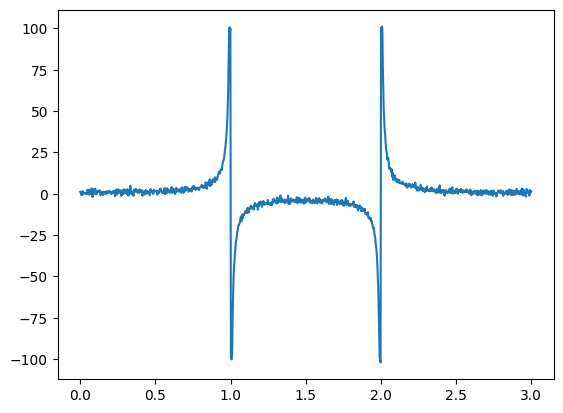

In [18]:
alpha = random.uniform (0, 1)
beta = random.uniform (0, 1)

xk = np.array([3*i/1000 for i in range(0, 1001)])
yk = f(xk)

for i in range(len(yk)):
    if yk[i] >= -100 and yk[i] <= 100:
        yk[i] = yk[i] + random.normalvariate(0, 1)
    elif yk[i] < -100:
        yk[i] = -100 + random.normalvariate(0, 1)
    else:
        yk[i] = 100 + random.normalvariate(0, 1)

plt.plot(xk,yk)

In [19]:
from scipy.optimize import minimize
from scipy.optimize import least_squares
from scipy.optimize import differential_evolution
!pip install -q pyswarm
from pyswarm import pso

  Preparing metadata (setup.py) ... done


In [20]:
def f_ration(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def D_ration(par):
    a, b, c, d = par
    return np.sum((f_ration(xk, a, b, c, d) - yk) ** 2)

def ration(par):
    a, b, c, d = par
    return (f_ration(xk, a, b, c, d) - yk) ** 2

In [21]:
def nelder_mead(f, start):
    return minimize(f, start, method = 'nelder-mead', tol=1e-3)

In [50]:
def lm(f, start):
    return least_squares(f, start, method="lm", xtol=1e-3)

In [23]:
def diff_evol(f, bounds):
    return differential_evolution(f, bounds, tol = 1e-3)

In [38]:
def swarm(f, lb, ub):
    xopt, fopt = pso(f, lb, ub, minfunc = 1e-3, debug=True)
    return xopt

In [25]:
x0 = [1] * 4
nm_res = nelder_mead(D_ration, x0)

In [51]:
lm_res = lm(ration, x0)

In [27]:
bounds = [(-2,2), (-2,2), (-2,2), (-2,2)]
de_res = diff_evol(D_ration, bounds)

In [39]:
lb = [-2] * 4
ub = [2] * 4
sw_res = swarm(D_ration, lb, ub)

No constraints given.
New best for swarm at iteration 1: [-1.37163392 -0.1869816  -2.          1.71634147] 267163.68747955875
New best for swarm at iteration 1: [-1.99069968  2.         -2.          1.41656457] 265864.54499003926
Best after iteration 1: [-1.99069968  2.         -2.          1.41656457] 265864.54499003926
New best for swarm at iteration 2: [-2.          1.85158343 -2.          1.14990887] 262717.28067803476
New best for swarm at iteration 2: [-2.          2.         -2.          1.11508807] 262233.5718940832
Best after iteration 2: [-2.          2.         -2.          1.11508807] 262233.5718940832
Best after iteration 3: [-2.          2.         -2.          1.11508807] 262233.5718940832
New best for swarm at iteration 4: [-2.          2.         -2.          1.00702379] 244303.7034159638
Best after iteration 4: [-2.          2.         -2.          1.00702379] 244303.7034159638
Best after iteration 5: [-2.          2.         -2.          1.00702379] 244303.7034159638

In [69]:
print('Coefficients:')
pd.DataFrame([nm_res.x, lm_res.x, de_res.x, sw_res], columns=['a','b','c','d'])

Coefficients:


,a,b,c,d
0,-1.006883,1.007384,-2.000979,1.000995
1,-0.878272,0.876999,-1.974486,0.974751
2,-1.013012,1.013263,-2.000000,1.000017
3,-2.000000,2.000000,-2.000000,1.000097


In [52]:
print('f-calculations:', [nm_res.nfev, lm_res.nfev, de_res.nfev, 19])

f-calculations: [587, 195, 8195, 19]


In [57]:
print('f-calculations:', [nm_res.nit, lm_res.nfev, de_res.nit, 36])

f-calculations: [349, 195, 133, 36]


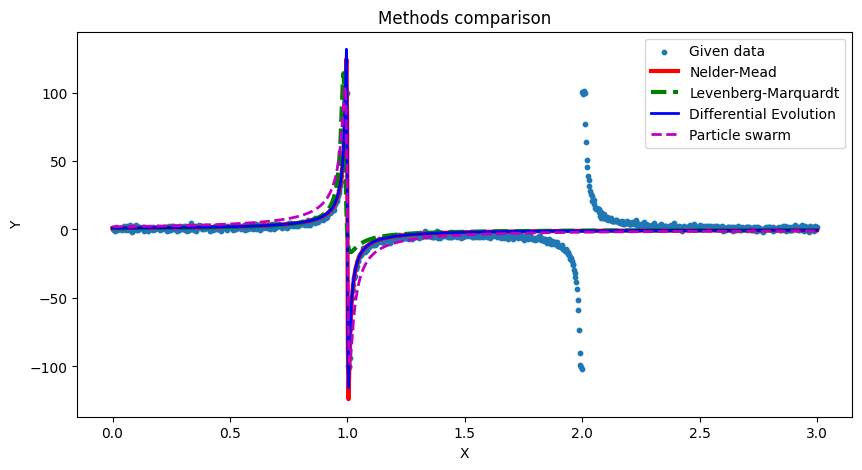

In [29]:
plt.figure(figsize=(10,5))
plt.title("Methods comparison")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xk,yk, label = "Given data", s=10)
plt.plot(xk, f_ration(xk, *nm_res.x), 'r', label="Nelder-Mead", linewidth = 3)
plt.plot(xk, f_ration(xk, *lm_res.x), 'g', label="Levenberg-Marquardt", linewidth = 3, linestyle='dashed')
plt.plot(xk, f_ration(xk, *de_res.x), 'b', label="Differential Evolution", linewidth = 2)
plt.plot(xk, f_ration(xk, *sw_res), 'm', label="Particle swarm", linewidth = 2, linestyle='dashed')
plt.legend()

# Part II

In [2]:
import pandas as pd

dataset_url = "https://people.sc.fsu.edu/~jburkardt/datasets/cities/wg22_xy.txt"
data = pd.read_csv(dataset_url, skiprows=[1], delim_whitespace= True)
data.columns = ['x', 'y']

In [3]:
data = data.iloc[random.sample(range(len(data)), 15)]

In [4]:
from scipy.spatial.distance import cdist
distance_matrix = cdist(data, data)

In [5]:
import networkx as nx
from networkx.algorithms import approximation

G = nx.Graph()
for i in range(len(data)):
    for j in range(len(data)):
        if i != j:
            G.add_edge(i, j, weight = distance_matrix[i,j])

In [6]:
incycle = random.sample(range(len(data)), len(data))
incycle.append(incycle[0])

Cost: 1557.2334631153908


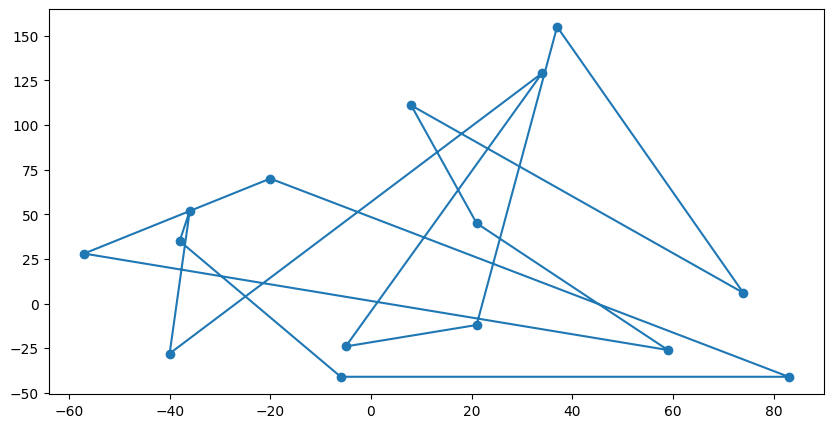

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(data['x'],data['y'])
plt.plot(data.iloc[incycle]['x'], data.iloc[incycle]['y'])
cost = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(incycle))
print("Cost:", cost)

In [15]:
cycle = approximation.simulated_annealing_tsp(G, incycle, source = incycle[0], max_iterations = 1000)

Cost: 743.5454609718938


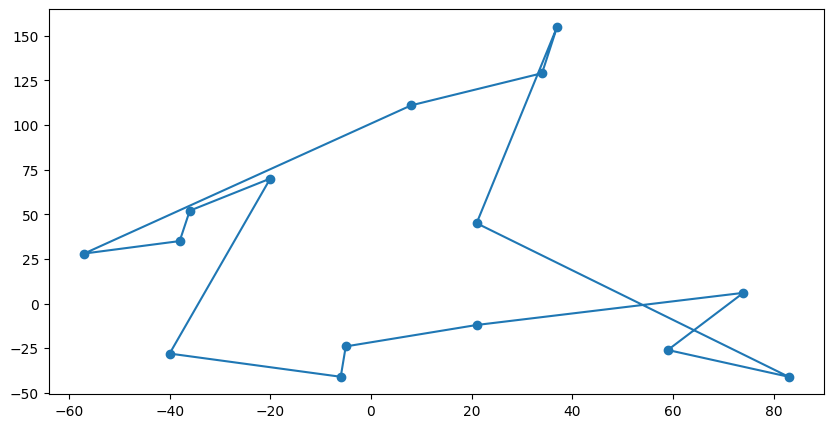

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(data['x'],data['y'])
plt.plot(data.iloc[cycle]['x'], data.iloc[cycle]['y'])
cost = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
print("Cost:", cost)